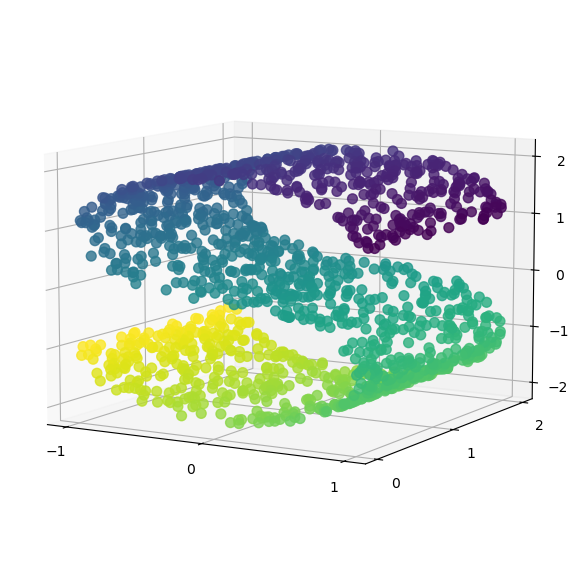

In [1]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from matplotlib import ticker

from sklearn import datasets, manifold

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

def plot_3d(points, points_color, title=None):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    #fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    #plt.savefig("../kolloquium/S.png", dpi=500)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    #ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color)


In [2]:
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

params = {
    "n_neighbors": n_neighbors,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": 0,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(S_points)

lle_ltsa = manifold.LocallyLinearEmbedding(method="ltsa", **params)
S_ltsa = lle_ltsa.fit_transform(S_points)

lle_hessian = manifold.LocallyLinearEmbedding(method="hessian", **params)
S_hessian = lle_hessian.fit_transform(S_points)

lle_mod = manifold.LocallyLinearEmbedding(method="modified", **params)
S_mod = lle_mod.fit_transform(S_points)

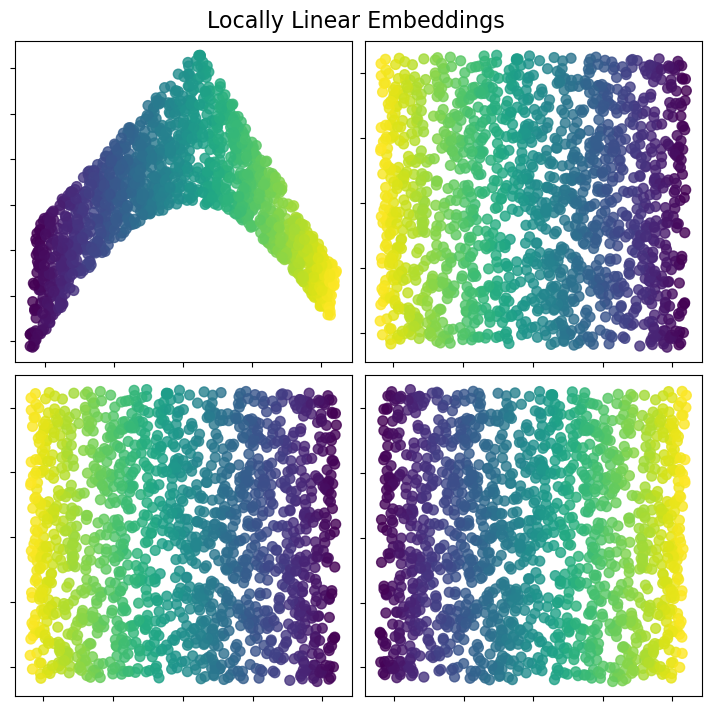

In [3]:
fig, axs = plt.subplots(
    nrows=2, ncols=2, figsize=(7, 7), facecolor="white", constrained_layout=True
)
fig.suptitle("Locally Linear Embeddings", size=16)

lle_methods = [
    ("Standard locally linear embedding", S_standard),
    ("Local tangent space alignment", S_ltsa),
    ("Hessian eigenmap", S_hessian),
    ("Modified locally linear embedding", S_mod),
]
for ax, method in zip(axs.flat, lle_methods):
    name, points = method
    add_2d_scatter(ax, points, S_color, name)

plt.show()


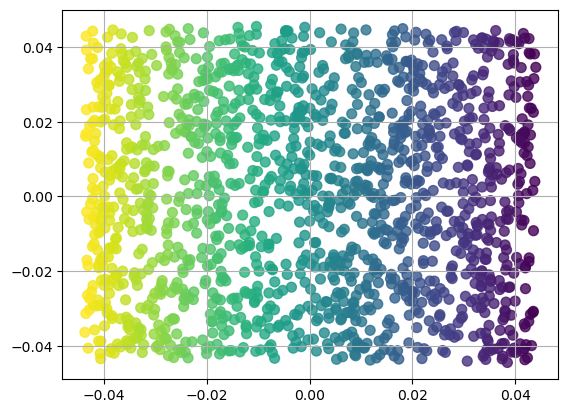

In [4]:
plt.grid(True)
ltsa_method = lle_methods[1][1]

plt.scatter(ltsa_method[:, 0], ltsa_method[:, 1], c=S_color, s=50, alpha=.8)
#plt.savefig("../kolloquium/S-reduced.png", dpi=500)

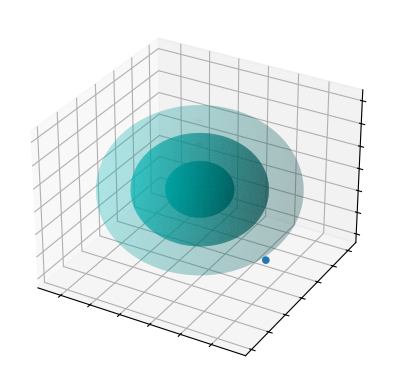

In [84]:
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('_mpl-gallery')

# Make data
np.random.seed(32)
n = 2
rng = np.random.default_rng()
xs = rng.uniform(2, 3, n)
ys = rng.uniform(0.5, 1, n)
zs = rng.uniform(-3, -2.5, n)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


# Erstelle eine "fuzzy Kugel" um den Punkt mit Index 0
radius = 0.1
theta, phi = np.mgrid[0.0:2.0 * np.pi:1000j, 0.0:np.pi:500j]
x_sphere = radius * np.sin(phi) * np.cos(theta) + xs[0]
y_sphere = radius * np.sin(phi) * np.sin(theta) + ys[0]
z_sphere = radius * np.cos(phi) + zs[0]

radius2 = 0.2
theta2, phi2 = np.mgrid[0.0:2.0 * np.pi:1000j, 0.0:np.pi:500j]
x_sphere2 = radius2 * np.sin(phi2) * np.cos(theta2) + xs[0]
y_sphere2 = radius2 * np.sin(phi2) * np.sin(theta2) + ys[0]
z_sphere2 = radius2 * np.cos(phi2) + zs[0]

radius3 = 0.3
theta3, phi3 = np.mgrid[0.0:2.0 * np.pi:1000j, 0.0:np.pi:500j]
x_sphere3 = radius3 * np.sin(phi3) * np.cos(theta3) + xs[0]
y_sphere3 = radius3 * np.sin(phi3) * np.sin(theta3) + ys[0]
z_sphere3 = radius3 * np.cos(phi3) + zs[0]

ax.plot_surface(x_sphere, y_sphere, z_sphere, color='c', alpha=np.exp(- radius**2 / 0.05))
ax.plot_surface(x_sphere2, y_sphere2, z_sphere2, color='c', alpha=np.exp(- radius2**2 / 0.05))
ax.plot_surface(x_sphere3, y_sphere3, z_sphere3, color='c', alpha=np.exp(- radius3**2 / 0.05))

# Plotte die originalen Datenpunkte
ax.scatter(xs, ys, zs, label='Datenpunkte')

# Entferne die Achsenticklabels
ax.set(xticklabels=[], yticklabels=[], zticklabels=[])

# Anzeigen des Plots
plt.show()

